https://raw.githubusercontent.com/shivang98/Social-Network-ads-Boost/master/Social_Network_Ads.csv

Raw Data : https://github.com/shivang98/Social-Network-ads-Boost/blob/master/Social_Network_Ads.csv

In [1]:
!pip3 install numpy
!pip3 install pandas
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install sklearn

In [22]:
import numpy as NP
import pandas as PD
import seaborn as SNS
import matplotlib.pyplot as MPLOT
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

In [3]:

DF = PD.read_csv("https://raw.githubusercontent.com/shivang98/Social-Network-ads-Boost/master/Social_Network_Ads.csv")
print("Shape :",DF.shape)
print("Size :",DF.size)
DF.sample   (10)

Shape : (400, 5)
Size : 2000


,User ID,Gender,Age,EstimatedSalary,Purchased
158,15762605,Male,26,30000,0
364,15654456,Male,42,104000,1
288,15649668,Male,41,79000,0
103,15675949,Female,33,149000,1
329,15639576,Female,47,107000,1
56,15775562,Female,23,48000,0
106,15706185,Female,26,35000,0
239,15772073,Female,53,143000,1
298,15675791,Male,45,79000,0
48,15727696,Male,30,135000,1


In [4]:
DF.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [5]:
DF.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
DF.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
DF.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

---
### Dropping unwanted Information
We will drop User ID Column as it is not useful in classification

In [8]:
DF.drop(columns=['User ID'], inplace=True)
DF.sample(10)

,Gender,Age,EstimatedSalary,Purchased
364,Male,42,104000,1
92,Male,26,15000,0
16,Male,47,25000,1
41,Female,33,51000,0
186,Female,20,82000,0
168,Male,29,148000,1
241,Male,38,59000,0
150,Female,26,15000,0
259,Female,45,131000,1
10,Female,26,80000,0


---
### Converting Data to Category
Gender == Categorical Data --> So will convert into number (encoding)

In [9]:
DF.dtypes

Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [10]:
DF['Gender'] = DF['Gender'].astype('category')
DF.dtypes


Gender             category
Age                   int64
EstimatedSalary       int64
Purchased             int64
dtype: object

In [11]:
DF['Gender'] = DF['Gender'].cat.codes
DF.sample(10) 

,Gender,Age,EstimatedSalary,Purchased
334,1,57,60000,1
286,0,37,62000,0
336,1,58,144000,1
203,0,41,71000,0
115,1,40,57000,0
251,1,37,52000,0
370,0,60,46000,1
391,1,47,23000,1
254,0,50,44000,0
243,0,56,104000,1


---
### Removing Outliers
Now will detect and remove oultiers

<AxesSubplot:>

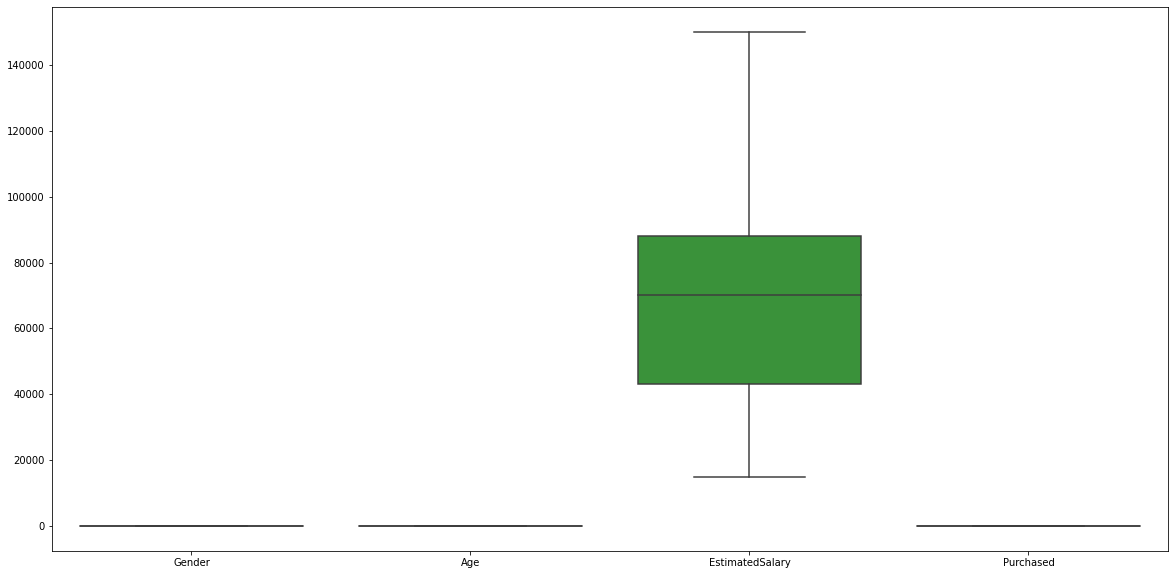

In [12]:
fig, ax = MPLOT.subplots(figsize=(20,10))
SNS.boxplot(data=DF, ax=ax)

In [13]:
def Remove_Outlier(DataFrame, Col_Name) :
    Upper_Threshold = DataFrame[Col_Name].mean() + 3*DataFrame[Col_Name].std()
    Lower_Threshold = DataFrame[Col_Name].mean() - 3*DataFrame[Col_Name].std()
    Count = DataFrame[(DataFrame[Col_Name] >= Upper_Threshold ) | (DataFrame[Col_Name] <= Lower_Threshold)][Col_Name].count()
    print("[ * ] In", str(Col_Name), "->", "High :" ,Upper_Threshold, "| Low :", Lower_Threshold, "| -> Outliers Detected :", Count)
    return DataFrame[((DataFrame[Col_Name] >= Lower_Threshold ) & (DataFrame[Col_Name] <= Upper_Threshold))]

In [14]:
Remove_Outlier( DF, 'Gender' )
Remove_Outlier( DF, 'Age' )
Remove_Outlier( DF, 'EstimatedSalary' )
Remove_Outlier( DF, 'Purchased' )

[ * ] In Gender -> High : 1.991578117217104 | Low : -1.0115781172171041 | -> Outliers Detected : 0
[ * ] In Age -> High : 69.10362979192374 | Low : 6.206370208076258 | -> Outliers Detected : 0
[ * ] In EstimatedSalary -> High : 172033.38084727435 | Low : -32548.380847274355 | -> Outliers Detected : 0
[ * ] In Purchased -> High : 1.797091890790607 | Low : -1.0820918907906072 | -> Outliers Detected : 0


,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


---
# Corelation Matrix

<AxesSubplot:>

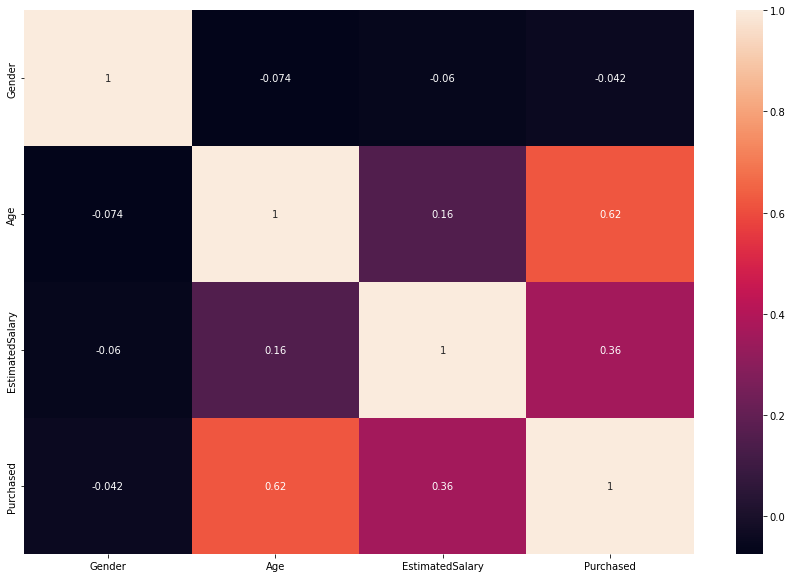

In [15]:
fig, ax = MPLOT.subplots(figsize=(15,10))
SNS.heatmap(DF.corr(), annot = True, ax=ax)

---
# Train Model

In [16]:
X = DF[['Age', 'EstimatedSalary']]
Y = DF['Purchased']

X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(
    X,
    Y,
    test_size=0.2,
    random_state=42)


model = LogisticRegression()
model.fit(X_TRAIN, Y_TRAIN)
output = model.predict(X_TEST)
    

print("Mean Absolute Error :", mean_absolute_error(Y_TEST, output))
print("Model Score (Accuracy) :", model.score(X_TEST, Y_TEST))

Mean Absolute Error : 0.35
Model Score (Accuracy) : 0.65


---
# Data Normalization and Training Model

In [17]:
DF.describe()

,Gender,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,0.490000,37.655000,69742.500000,0.357500
std,0.500526,10.482877,34096.960282,0.479864
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.750000,43000.000000,0.000000
50%,0.000000,37.000000,70000.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


In [18]:
X = DF[['Age', 'EstimatedSalary']]
Y = DF['Purchased']

X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X, Y, test_size=0.2, random_state=42)

# fit scaler on training data
norm = MinMaxScaler().fit(X_TRAIN)

# transform training data
X_TRAIN = norm.transform(X_TRAIN)

# fit scaler on training data
norm = MinMaxScaler().fit(X_TEST)

# transform training data
X_TEST = norm.transform(X_TEST)


model = LogisticRegression()
model.fit(X_TRAIN, Y_TRAIN)
output = model.predict(X_TEST)
    

print("Mean Absolute Error :", mean_absolute_error(Y_TEST, output))
print("Model Score (Accuracy) :", model.score(X_TEST, Y_TEST))

Mean Absolute Error : 0.125
Model Score (Accuracy) : 0.875


- Total_Samples = TP + TN + FP + FN
- Accuracy = (TP + TN) / Total
- Precision = TP / (TP + FP)
- Recall - **Correctness of a class**
    - Yes -> TP / 

---

# Plotting Confusion Matrix

In [25]:
from sklearn.metrics import confusion_matrix

In [42]:
#Fit the model
logreg = LogisticRegression(C=1e5)
logreg.fit(X_TRAIN,Y_TRAIN)
#Generate predictions with the model using our X values
Y_PRED = logreg.predict(X_TEST)

cf_matrix = confusion_matrix(Y_TEST, Y_PRED)
print(cf_matrix)
print("True Negative  : ",cf_matrix[0][0])
print("False Negative : ",cf_matrix[0][1])
print("True Positive : ",cf_matrix[1][1])
print("False Positive : ",cf_matrix[1][0])

[[50  2]
 [ 9 19]]
True Negative  :  50
False Negative :  2
True Positive :  19
False Positive :  9


<AxesSubplot:>

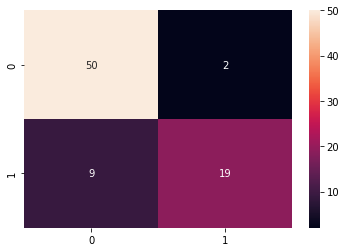

In [32]:
SNS.heatmap(cf_matrix, annot=True)

In [40]:
from sklearn.metrics import precision_recall_fscore_support
print("Micro -",precision_recall_fscore_support(Y_TEST, Y_PRED, average='micro'))
print("Macro -",precision_recall_fscore_support(Y_TEST, Y_PRED, average='macro'))
print("Weighted -",precision_recall_fscore_support(Y_TEST, Y_PRED, average='weighted'))
print("\n\n\n")
SCORE = precision_recall_fscore_support(Y_TEST, Y_PRED, average='macro')
print('Precision :', SCORE[0])
print('Recall :', SCORE[1])
print('F-Score :', SCORE[2])

Micro - (0.8625, 0.8625, 0.8625, None)
Macro - (0.8761097659402743, 0.820054945054945, 0.8382055524912668, None)
Weighted - (0.8675141242937853, 0.8625, 0.857014157014157, None)




Precision : 0.8761097659402743
Recall : 0.820054945054945
F-Score : 0.8382055524912668
